In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
import numpy as np
from scipy.optimize import curve_fit

def model(T, A, B):
    return A * np.exp(-B / (8.31 * T))

T_fcc = np.array([300, 1350])
M_fcc = np.array([2.12e-9, 3.05e-9])
# M_fcc = np.array([1.12e-14, 2.05e-14])

T_liq = np.array([1330, 3000])
# M_liq = np.array([2.05e-9, 3.02e-8])
M_liq = np.array([2.05e-7, 3.02e-7])

params_FCC, covariance_FCC = curve_fit(model, T_fcc, M_fcc, p0=[1e-12, 1e4])
params_LIQ, covariance_LIQ = curve_fit(model, T_liq, M_liq, p0=[1e-9,  1e4])

A_FCC, B_FCC = params_FCC
A_LIQ, B_LIQ = params_LIQ

# Display the results
print(f"LIQUID:  A_LIQ, B_LIQ  = {A_LIQ:.2e}  {B_LIQ:.2f}")
print(f"FCC:     A_FCC, B_FCC  = {A_FCC:.2e}  {B_FCC:.2f}")

LIQUID:  A_LIQ, B_LIQ  = 4.11e-07  7691.94
FCC:     A_FCC, B_FCC  = 3.38e-09  1165.84


/tmp/ipykernel_28686/1284384676.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params_FCC, covariance_FCC = curve_fit(model, T_fcc, M_fcc, p0=[1e-12, 1e4])
/tmp/ipykernel_28686/1284384676.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  params_LIQ, covariance_LIQ = curve_fit(model, T_liq, M_liq, p0=[1e-9,  1e4])


In [41]:
T_LIQ = np.linspace(1350,2800,1650)
T_FCC = np.linspace(300,1320,1020)

factor = 1e-8
# A_LIQ, B_LIQ = 4.11e-07, 7691.94
# A_FCC, B_FCC = 2.44e-10, 1937.63

M_LIQ = factor*(A_LIQ*np.exp(-B_LIQ/(8.31*T_LIQ)))
M_FCC = factor*(A_FCC*np.exp(-B_FCC/(8.31*T_FCC)))

# factor = 8.58e-10
# M_LIQ = factor*(3.39e-06*np.exp(-3043/(8.31*T_LIQ)))
# M_FCC = factor*(2.03e-06*np.exp(-7501/(8.31*T_FCC)))

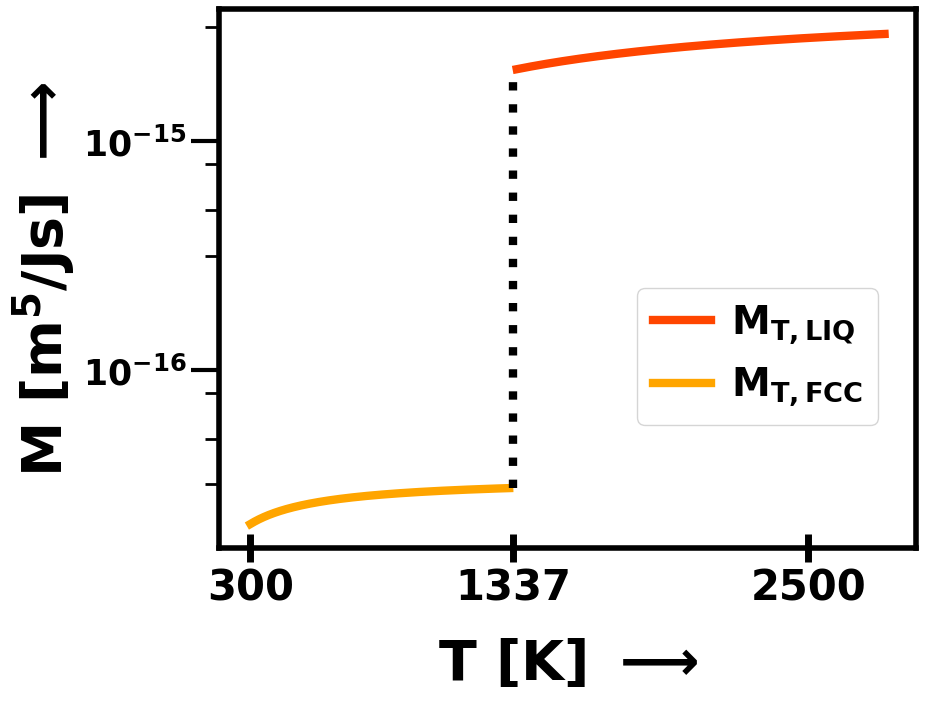

In [45]:
fig, ax1 = plt.subplots(1,1, figsize=(9,7), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.3)

l_LIQ = ax1.plot(T_LIQ, M_LIQ, linestyle='-', color='orangered', label='M$\mathbf{_{T, LIQ}}$',linewidth = 6)
l_FCC = ax1.plot(T_FCC, M_FCC, linestyle='-', color='orange', label='M$\mathbf{_{T, FCC}}$', linewidth=6)
ax1.vlines(x=1337, ymin=M_FCC[-1], ymax=M_LIQ[0], linestyle=':', color='k', linewidth=6)
# ax1.set_ylabel(r'M $\mathbf{\left[\frac{m^5}{J s}\right]}$ $\mathbf{\longrightarrow}$', color='k', weight='bold', fontsize=40)
ax1.set_ylabel(r'M $\mathbf{[m^5/J s]}$ $\mathbf{\longrightarrow}$', color='k', weight='bold', fontsize=40)
ax1.set_xlabel(r"T [K] $\mathbf{\longrightarrow}$", weight = 'bold', size=40, labelpad=20, color='k')
ax1.set_yscale('log', base=10, subs=[10**x for x in (0,0.5,0.7,0.9,1)], nonpositive='mask')
ax1.set_xticks([300, 1337, 2500, ], labels=['300', '1337', '2500', ], size=30, color='k', weight='bold')
ax1.set_yticks([1e-16, 1e-15,], labels=[ r'10$\mathbf{^{-16}}$', r'10$\mathbf{^{-15}}$',], size=25, color='k', rotation=0,  weight='bold')
ax1.tick_params(axis='x', direction='inout', which='both', length=20, width=5)
ax1.tick_params(axis='y', which='major', direction='out', length=20, width=3)
ax1.tick_params(axis='y', which='minor', direction='out', length=10, width=2)

ax1.legend(loc=(0.6, 0.23), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'28',},  handletextpad=0.5, handlelength=1.5,   frameon=True)
ax1.spines[:].set_linewidth(4)

# plt.savefig('../../figures/mobilities.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/mobilities.jpg',bbox_inches='tight',)

plt.show()